## **LABWORK 3 - Dummy Data Classification Using SVM**

### **Linear SVM**

**Step 0 - Import Library**

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Step 1 - Create Dummy Data** 

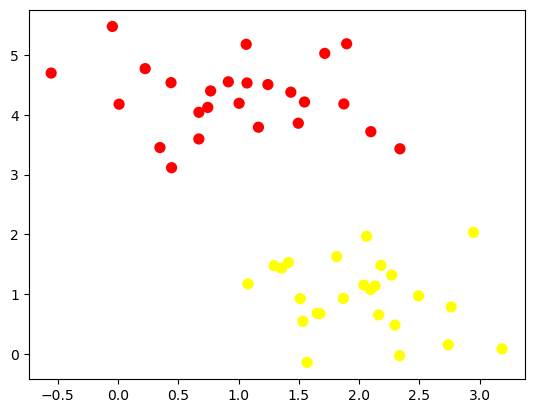

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Step 2 - Create Decision Boundaries**

To create a classification model, a decision boundary between two formed class of data is needed. However, this condition still leaves cases where more than one separating boundary is required.

(-1.0, 3.5)

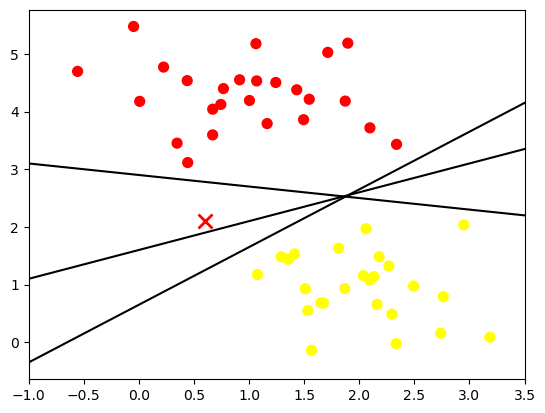

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

The presence of multiple decision boundaries indicates that there are several possibilities for a new data point to belong to a particular category. A new data point 'x' is situated in a different position from the data in the other two classes, causing this new data point not to fall into the categories of the previous two classes.

**Step 3 - Create Margins**

The margin within a line can also be used to clarify the position of a data point with respect to the label.

(-1.0, 3.5)

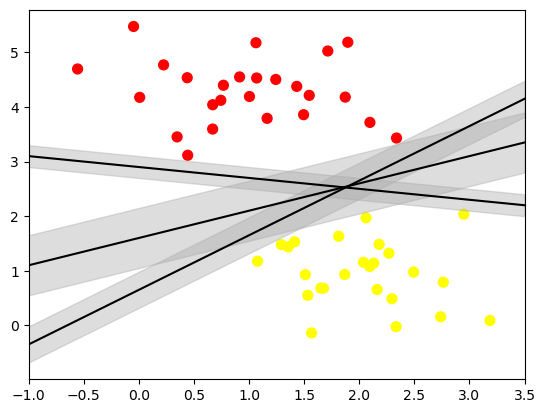

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

The margin used in SVM serves to indicate the most optimal model. This optimal criterion is obtained by determining which line can maximize the existing margin.

**Step 4 - Model Fitting**

The previous step shows how SVM classifier works. In this step, we will use scikit-learn to create a SVM model.

In [5]:
from sklearn.svm import SVC # "Support vector classifier"

# Initaite SVC object
model = SVC(kernel='linear', C=1E10)

# Fitting
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

**Step 4.1 - Visualize Fitting Model**

In [6]:
# create a function to plot decision boundary

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Result


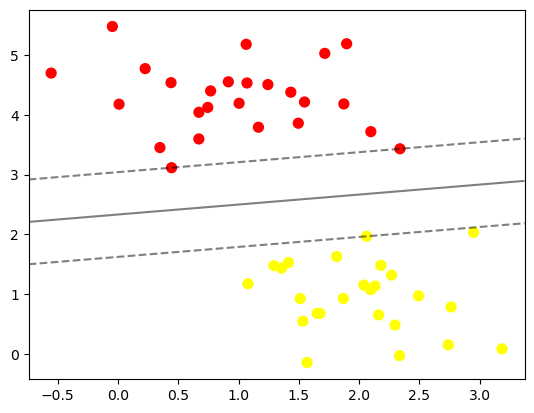

In [8]:
print('Result')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

***Several data points that touch (enter) the area around the line are referred to as support vectors.***

Result


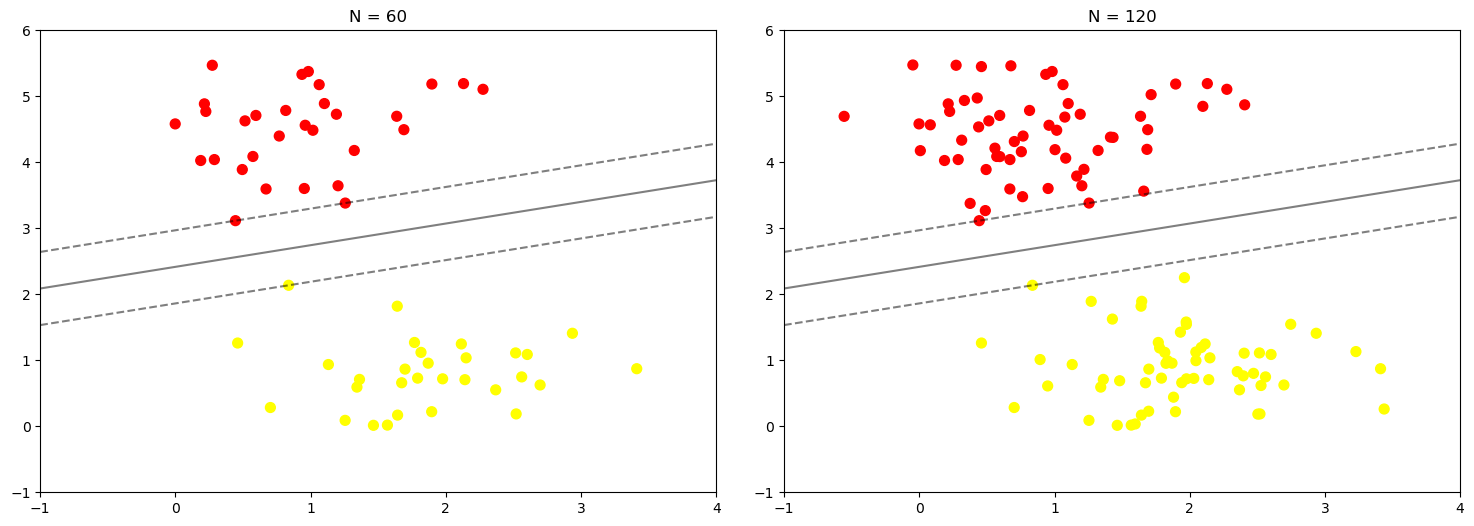

In [9]:
model.support_vectors_
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

print('Result')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### **Non-Linear SVM**

**Step 1 - Create Dummy Data**

Result


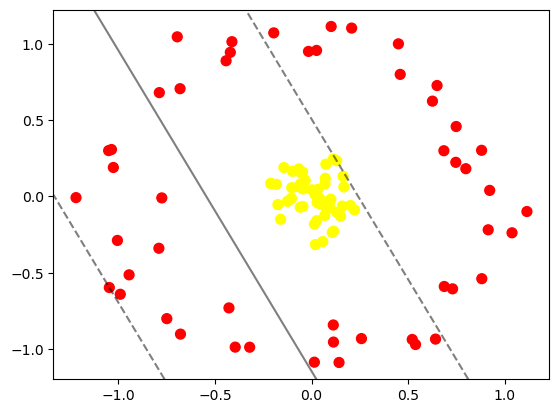

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

print('Result')
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

> Based on the example data above, no linear separating line can be found that can serve as a data separator. Therefore, another perspective or projection of the data is needed to clearly separate the data. In this activity, the projection used is based on a radial basis. Since the radial projection doesn't suffice with a 2D model, the visualization plot is transformed into a 3D model.

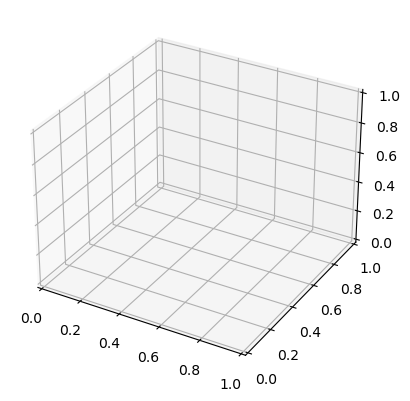

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.78585628,  1.96688602],
       [ 1.1372926 ,  0.54740762],
       [-0.02596621,  4.92577961],
       [ 0.26604148,  2.71915015],
       [ 3.00569136,  1.15121775],
       [ 1.34880003,  3.07479238],
       [ 1.01287689,  4.15404025],
       [ 3.59362114,  2.08207549],
       [ 0.66640862,  4.06194513],
       [ 1.41253979,  0.34602384],
       [ 0.69794036,  4.4288665 ],
       [ 1.75992205,  0.70616032],
       [ 1.14289006,  5.08509856],
       [ 0.25043139,  4.34534364],
       [ 1.84086482,  1.53962878],
       [ 3.96178334,  1.65324725],
       [ 2.95657626,  0.03371845],
       [ 0.43830172,  4.0161448 ],
       [ 1.00254159,  0.52839598],
       [ 1.43933466,  1.32906301],
       [ 1.10022802,  4.60631734],
       [ 0.72702805,  4.3487196 ],
       [ 1.46361712,  2.13207534],
       [ 0.04415021,  5.02444852],
       [ 2.47388885,  0.76042659],
       [ 0.893695  ,  4.63226613],
       [ 1.45946366,  0.23651283],
       [

In [20]:
from mpl_toolkits import mplot3d
from ipywidgets import interact,fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

**Step 2 - Fitting Model**

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

**Step 2.1 - Visualize Decision Boundary**

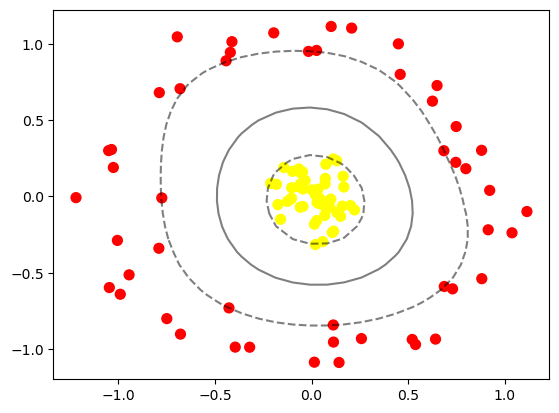

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**Case on Overlapping Data**

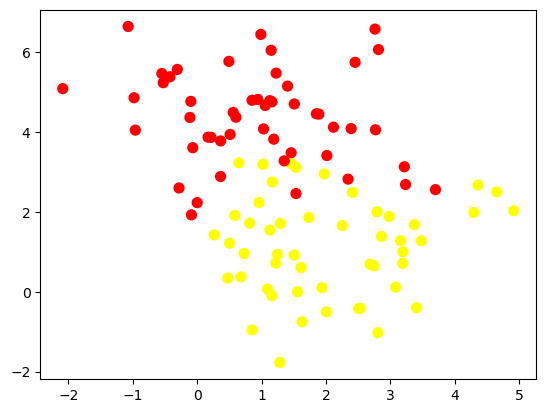

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

The example below demonstrates how changes in C can impact the final fitting result.

Result


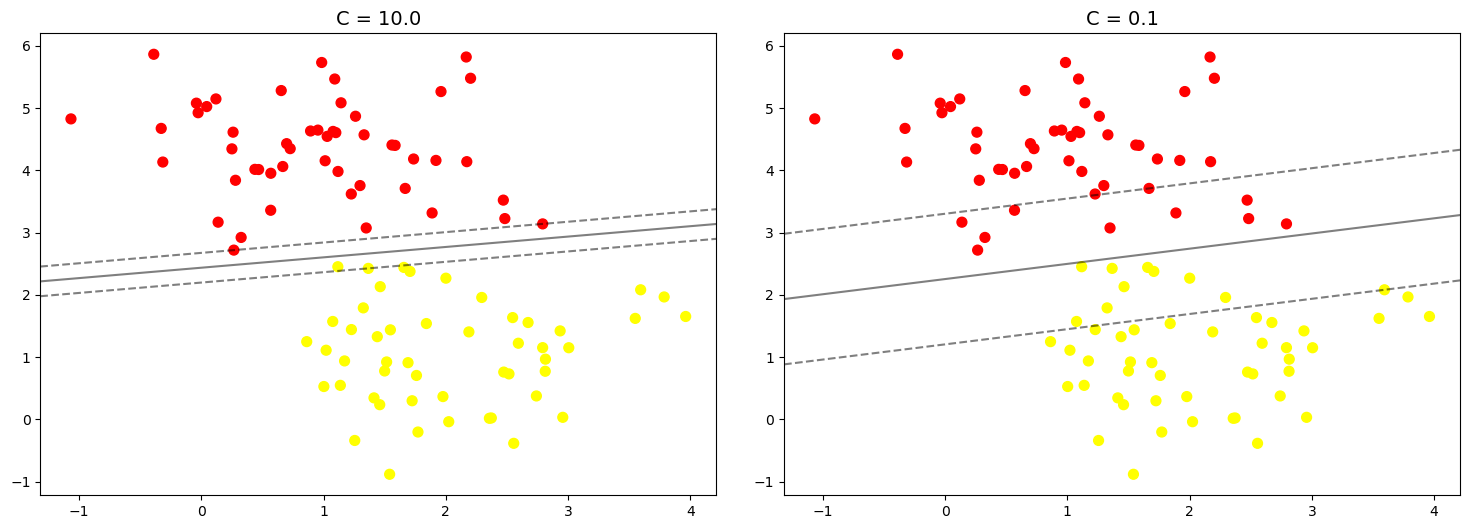

In [19]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)
print('Result')